In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV, learning_curve, cross_validate
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
wine = pd.read_csv('data/wine.csv',sep=';')
bins = (2, 6.5, 8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins=bins,labels=group_names)
wine = wine.dropna()
wine_label_quality = LabelEncoder()
wine['quality'] = wine_label_quality.fit_transform(wine['quality'])

X = wine.drop('quality',axis=1)
y = wine['quality']

X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
kmeans = KMeans(n_clusters=15, n_init=50, max_iter=1000, random_state=44, 
                n_jobs=-2).fit(X)
labels = kmeans.labels_

In [4]:
labels=labels.reshape(-1,1)

In [5]:
nn_clf = MLPClassifier(hidden_layer_sizes=(85,), learning_rate_init=0.01)
nn_clf.fit(labels, y)
nn_y_pred = nn_clf.predict(labels)
nn_acc = accuracy_score(y, nn_y_pred)*100
print("Tuned Accuracy: %.2f%%"%nn_acc)

Tuned Accuracy: 79.28%


In [6]:
train_sizes, nn_train_scores, test_scores = learning_curve(nn_clf,
                                                           labels,
                                                           y,
                                                           train_sizes=np.linspace(0.1,1.0,10),
                                                           verbose=3,
                                                           n_jobs=2)

[learning_curve] Training set sizes: [ 391  782 1174 1565 1957 2348 2739 3131 3522 3914]


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  17 out of  50 | elapsed:    9.1s remaining:   17.7s
[Parallel(n_jobs=2)]: Done  34 out of  50 | elapsed:   14.7s remaining:    6.8s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   19.4s finished


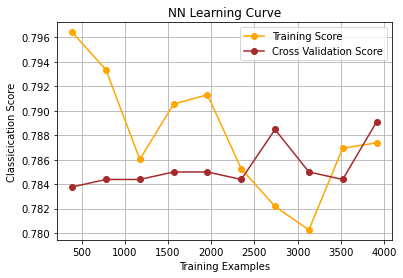

In [7]:
plt.figure()
plt.plot(train_sizes, np.mean(nn_train_scores, axis=1),'o-',
        label='Training Score',color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-',
        label='Cross Validation Score',color='red')
plt.title('NN Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Classicication Score')
plt.legend()
plt.grid()
#plt.savefig('img/NN_learning '+dataset+'.png')
plt.show()

No handles with labels found to put in legend.


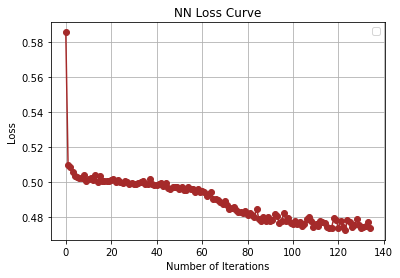

In [8]:
nn_loss= nn_clf.loss_curve_
plt.figure()
plt.title('NN Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.plot(nn_loss, 'o-', color='red')
plt.grid()
plt.legend()
#plt.savefig('img/NN_loss '+dataset+'.png')
plt.show()

In [9]:
gmm = GaussianMixture(n_components=15, max_iter=100, random_state=44, 
                      n_init=5).fit(X)
label = gmm.predict(X)

In [10]:
label = label.reshape(-1,1)

In [11]:
nn_clf = MLPClassifier(hidden_layer_sizes=(85,), learning_rate_init=0.01)
nn_clf.fit(labels, y)
nn_y_pred = nn_clf.predict(labels)
nn_acc = accuracy_score(y, nn_y_pred)*100
print("Tuned Accuracy: %.2f%%"%nn_acc)

Tuned Accuracy: 78.44%


In [12]:
train_sizes, nn_train_scores, test_scores = learning_curve(nn_clf,
                                                           labels,
                                                           y,
                                                           train_sizes=np.linspace(0.1,1.0,10),
                                                           verbose=3,
                                                           n_jobs=2)

[learning_curve] Training set sizes: [ 391  782 1174 1565 1957 2348 2739 3131 3522 3914]


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  17 out of  50 | elapsed:    9.1s remaining:   17.8s
[Parallel(n_jobs=2)]: Done  34 out of  50 | elapsed:   13.7s remaining:    6.4s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   19.8s finished


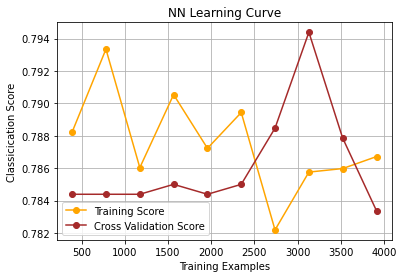

In [13]:
plt.figure()
plt.plot(train_sizes, np.mean(nn_train_scores, axis=1),'o-',
        label='Training Score',color='orange')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-',
        label='Cross Validation Score',color='brown')
plt.title('NN Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Classicication Score')
plt.legend()
plt.grid()
#plt.savefig('img/NN_learning '+dataset+'.png')
plt.show()

No handles with labels found to put in legend.


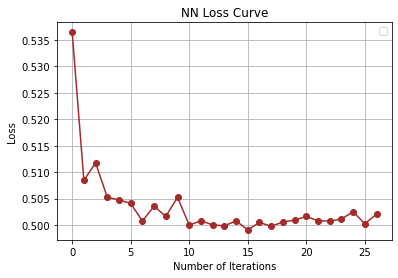

In [14]:
nn_loss= nn_clf.loss_curve_
plt.figure()
plt.title('NN Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.plot(nn_loss, 'o-', color='brown')
plt.grid()
plt.legend()
#plt.savefig('img/NN_loss '+dataset+'.png')
plt.show()